In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../Data/

/Users/cosmology/radiometer/MevJosCode/Data


In [3]:
ls

2017-02-17_14:20:32_Readout.txt  2017-02-17_15:31:04_Readout.txt
2017-02-17_14:24:37_Readout.txt  2017-02-17_15:32:38_Readout.txt
2017-02-17_14:53:03_Readout.txt  2017-02-17_15:34:44_Readout.txt
2017-02-17_14:56:03_Readout.txt  2017-02-17_15:36:12_Readout.txt
2017-02-17_14:57:30_Readout.txt  2017-02-17_15:38:29_Readout.txt
2017-02-17_14:59:57_Readout.txt  2017-02-17_15:39:52_Readout.txt
2017-02-17_15:02:19_Readout.txt  2017-02-17_15:42:39_Readout.txt
2017-02-17_15:03:55_Readout.txt  2017-02-17_15:44:21_Readout.txt
2017-02-17_15:06:03_Readout.txt  2017-02-17_15:46:15_Readout.txt
2017-02-17_15:08:13_Readout.txt  2017-02-17_15:47:37_Readout.txt
2017-02-17_15:10:18_Readout.txt  2017-02-17_15:49:46_Readout.txt
2017-02-17_15:15:37_Readout.txt  2017-02-17_15:51:07_Readout.txt
2017-02-17_15:18:00_Readout.txt  2017-02-17_15:52:34_Readout.txt
2017-02-17_15:19:45_Readout.txt  Data_Sheet.csv
2017-02-17_15:22:34_Readout.txt  OLD DATA/
2017-02-17_15:25:07_Readout.txt  READOUT_INFO.rtf
2017-02-17_15:

In [4]:
import glob

In [5]:
fnames = glob.glob('*.txt')

In [7]:
x = np.loadtxt(fnames[0])

In [9]:
x.shape

(593, 3)

In [11]:
fnames = fnames[2:]

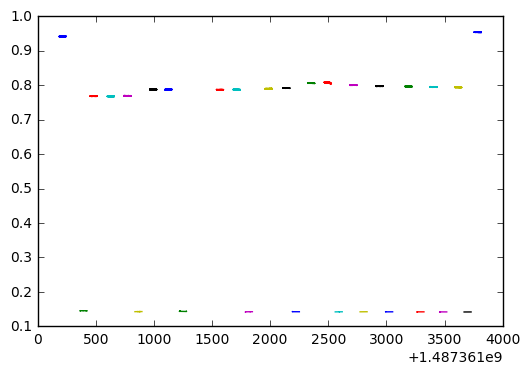

In [12]:
for f in fnames:
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])

In [14]:
nitrofiles = []
calibfiles = []
skyfiles = []

In [15]:
for f in fnames:
    x = np.loadtxt(f)
    if np.mean(x[:,1]) < 0.2:
        calibfiles.append(f)
    elif np.mean(x[:,1]) > 0.9:
        nitrofiles.append(f)
    else:
        skyfiles.append(f)

In [16]:
print nitrofiles

['2017-02-17_14:53:03_Readout.txt', '2017-02-17_15:52:34_Readout.txt']


In [17]:
print len(calibfiles)

11


In [18]:
print len(skyfiles)

16


In [43]:
x = np.loadtxt(nitrofiles[0])
nitrodata = x[:,1]
nitrotemp = 77.2 #Kelvin

In [44]:
nitrodata = np.mean(nitrodata)

In [45]:
nitrodata

0.94170016863406414

In [46]:
nitrotemp

77.2

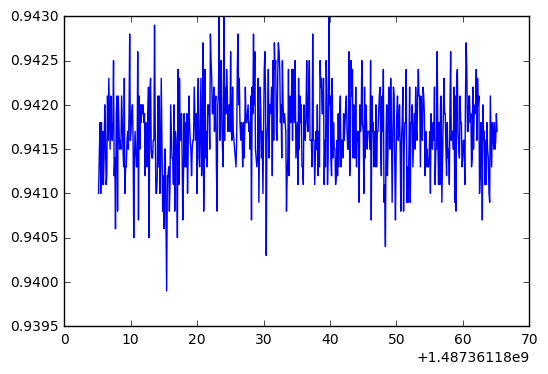

In [24]:
plot(x[:,0], x[:,1])

In [37]:
calibdata = []
calibtemp = []
for f in calibfiles:
    x = np.loadtxt(f)
    calibdata.append(x[:,1] * 10.)
    calibtemp.append(x[:,2])

In [38]:
len(calibdata)

11

In [39]:
len(calibdata[0])

593

In [40]:
len(calibtemp[0])

593

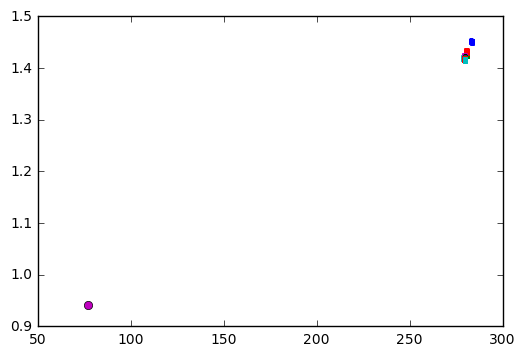

In [47]:
for k in range(11):
    plot(calibtemp[k], calibdata[k], '.')
plot(nitrotemp, nitrodata, 'o')

In [48]:
from scipy.optimize import curve_fit

In [51]:
tup = zip(calibtemp[0], calibdata[0])

In [56]:
x = sort(tup, axis=0)

In [57]:
x.shape

(593, 2)

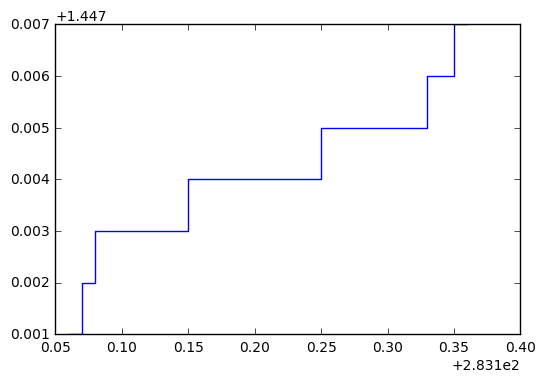

In [58]:
plot(x[:,0], x[:,1])

In [59]:
xdata = [nitrotemp]
ydata = [nitrodata]

In [60]:
for k in range(len(calibfiles)):
    xdata.append(np.mean(calibtemp[k]))
    ydata.append(np.mean(calibdata[k]))

In [62]:
len(ydata)

12

In [65]:
tup2 = zip(xdata, ydata)

In [67]:
print tup2

[(77.2, 0.94170016863406414), (283.32313659359193, 1.4512833052276561), (280.93453625632384, 1.4260370994940978), (280.76915682967956, 1.4322529510961215), (279.03472175379426, 1.4212613827993255), (279.42994940978076, 1.4233069139966272), (279.61827993254633, 1.4199713322091065), (279.77616554054055, 1.4203766891891891), (279.83070826306914, 1.4186408094435079), (279.42568296795957, 1.4183220910623946), (279.48523648648649, 1.4172415540540539), (279.63224283305226, 1.4156745362563237)]


In [66]:
z = sort(tup2, axis=0)

In [68]:
print z

[[  77.2           0.94170017]
 [ 279.03472175    1.41567454]
 [ 279.42568297    1.41724155]
 [ 279.42994941    1.41832209]
 [ 279.48523649    1.41864081]
 [ 279.61827993    1.41997133]
 [ 279.63224283    1.42037669]
 [ 279.77616554    1.42126138]
 [ 279.83070826    1.42330691]
 [ 280.76915683    1.4260371 ]
 [ 280.93453626    1.43225295]
 [ 283.32313659    1.45128331]]


In [69]:
xdata = z[:,0]
ydata = z[:,1]

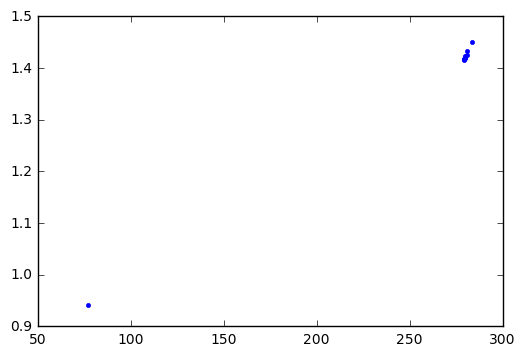

In [72]:
plot(xdata, ydata, '.')

In [73]:
def line(x, m, b):
    return m*x + b

In [87]:
popt = curve_fit(line, ydata, xdata)

In [88]:
popt

(array([ 419.23821591, -316.95323784]), array([[ 43.97811174, -60.85862915],
        [-60.85862915,  85.00388135]]))

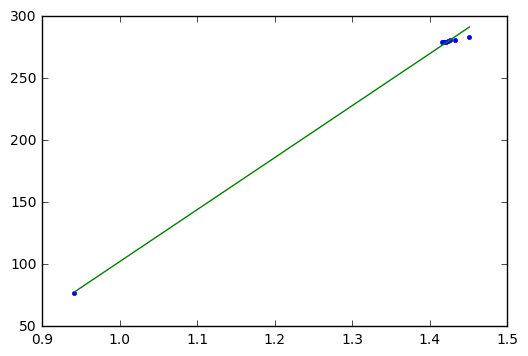

In [89]:
plot(ydata, xdata, '.')
plot(ydata, line(ydata, *popt[0]))

In [80]:
gain = popt[0][0]
trec = popt[0][1]

In [81]:
print 1./gain

420.287216397


In [85]:
print gain*100

0.237932528277


In [86]:
trec

0.75758879473829577

In [90]:
x = np.loadtxt(skyfiles[0])

In [91]:
t = x[:,0]
skydata = x[:,1]

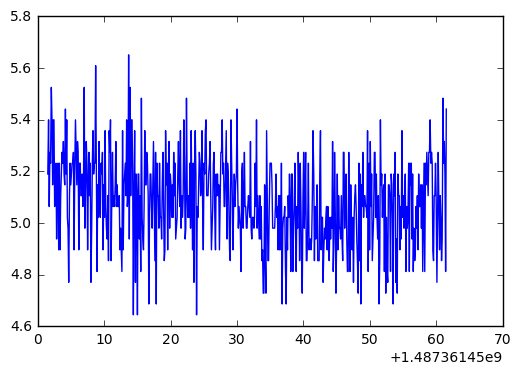

In [93]:
plot(t, line(skydata, *popt[0]))